In [2]:
# Import All required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib.axes import Subplot
%matplotlib inline
import pandas as pd
import numpy as np
from numpy.random import randn
from scipy import stats 
import requests
import seaborn as sns
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
import warnings

warnings.filterwarnings("ignore")

C:\Users\dtele\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
taws_df = pd.read_excel('just_3.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

In [12]:
#smaller version
taws_df.count()

CAUSE_LEVEL_1                30248
Description                  30248
Resolution                   23133
Corrective_Action_lessons    27446
General_Catigory             30248
LOCATION                     30248
Merge                        30248
dtype: int64

In [13]:
transformer = TfidfTransformer(smooth_idf=False)
transformer 

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [14]:
corpus = taws_df['Merge']

In [15]:
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(corpus).toarray()
print (X.shape)

(30248, 30382)


In [16]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '0000h',
 '0000hrs',
 '0005',
 '0006',
 '0008',
 '000lb',
 '001',
 '0010',
 '00100lt',
 '0015',
 '0015lt',
 '002',
 '0020',
 '0025',
 '00250lt',
 '0029',
 '003',
 '0030',
 '0035',
 '004',
 '0042lt',
 '0045',
 '0045hrs',
 '005',
 '005s',
 '006',
 '007',
 '009',
 '009591959',
 '00am',
 '00h18',
 '00lt',
 '00m',
 '01',
 '010',
 '0100',
 '0100hrs',
 '0100lt',
 '0105',
 '0105h',
 '011',
 '0110hrs',
 '0115',
 '0118',
 '011vwd',
 '012',
 '0125lt',
 '0130',
 '0130hr',
 '013vwd',
 '014',
 '0145',
 '015',
 '0150',
 '016',
 '0169',
 '017',
 '019',
 '01and',
 '01chk',
 '01fig',
 '01no',
 '01st',
 '02',
 '0200',
 '0200hrs',
 '021',
 '0210',
 '0212',
 '0215lt',
 '022',
 '0220',
 '0221',
 '0224',
 '0228',
 '022vcp',
 '0230',
 '0230hrs',
 '0234',
 '0237',
 '023as',
 '024',
 '0240',
 '0242',
 '0248',
 '025',
 '0250',
 '0255',
 '027â',
 '02chk',
 '02fig',
 '02frm',
 '03',
 '030',
 '0300',
 '0300lt',
 '0308',
 '031',
 '0310',
 '0313',
 '0315lt',
 '0318lt',
 '032',
 '0327hrs',
 '0

In [18]:
causes = taws_df["CAUSE_LEVEL_1"].unique()
cause_dict = {value:index for index, value in enumerate(causes)}
y = taws_df["CAUSE_LEVEL_1"].map(cause_dict)
cause_dict

{'     nb      vcnb  ': 5,
 'ENVIRONMENT / WEATHER': 1,
 'EQUIPMENT': 2,
 'ORGANIZATION': 4,
 'PEOPLE': 0,
 'UNSPECIFIED': 3}

In [22]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [23]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.76644628099173551

In [ ]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

In [21]:
y_test

19579    1
8253     0
25132    0
27674    0
15940    0
28590    0
13289    2
11237    0
8442     0
8308     0
27050    0
25598    2
29206    0
8690     0
1332     4
30096    0
7219     0
15859    2
21943    0
15708    0
1398     0
10889    2
20001    0
8798     0
18716    2
29563    0
6400     0
9044     2
18071    0
18001    0
        ..
22686    2
3358     0
22874    0
15111    0
20833    0
6858     0
27170    0
2650     0
19315    0
16093    0
27083    0
29193    0
12326    0
16446    2
8785     0
7433     0
19423    0
11131    0
8766     0
24048    0
27568    0
1727     0
4775     0
11254    0
17322    0
9933     2
20521    0
11022    0
386      0
15410    0
Name: CAUSE_LEVEL_1, dtype: int64

In [24]:
y_pred = clf.predict(X_test)

In [25]:
scores = cross_val_score(clf, X, y, cv = 5, scoring = 'f1_macro') 

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)") % (scores.mean(),scores.std()*2)

In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3976,    3,  603,    0,   94,    0],
       [  72,   14,   76,    0,    6,    0],
       [ 331,    5,  597,    0,   22,    0],
       [   6,    0,   10,    0,    4,    0],
       [ 115,    1,   64,    0,   50,    0],
       [   1,    0,    0,    0,    0,    0]])

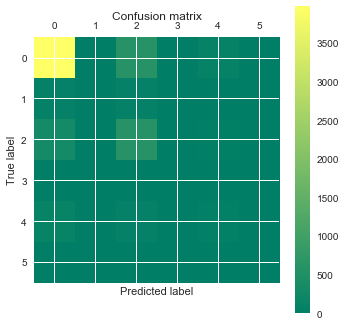

In [31]:
plt.matshow(cm)
plt.title('Confusion matrix')
c = plt.summer()
plt.colorbar(c)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
target_names = ['PEOPLE', 'ENVIRONMENT', 'EQUIPMENT', 'ORGANISATION', 'UNSPECIFIED']

In [ ]:
print(classification_report(m_test, m_pred, target_names=target_names))

In [ ]:
shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter=20, test_size=0.2)
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [ ]:
test_classifier(clf)

In [35]:
sample_dataframe = taws_df.sample(n=200)

In [38]:
cons_df = pd.read_excel('200sheetana.xlsx', 'Sheet1', index_col=None)

In [39]:
m_test = cons_df['humnan']

In [40]:
m_pred = cons_df['machine']

In [41]:
cm2 = confusion_matrix(m_test, m_pred)

In [42]:
cm2

array([[152,   0,  10,   0,   0],
       [  4,   3,   0,   0,   0],
       [  4,   0,  18,   0,   0],
       [  0,   0,   1,   0,   0],
       [  4,   0,   2,   0,   2]])

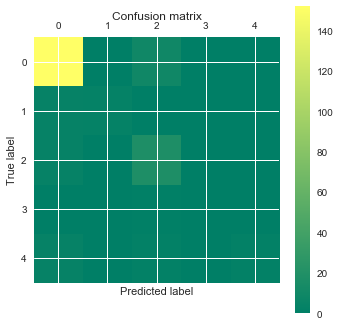

In [43]:
plt.matshow(cm2)
plt.title('Confusion matrix')
c = plt.summer()
plt.colorbar(c)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
print(classification_report(m_test, m_pred, target_names=target_names))

              precision    recall  f1-score   support

      PEOPLE       0.93      0.94      0.93       162
 ENVIRONMENT       1.00      0.43      0.60         7
   EQUIPMENT       0.58      0.82      0.68        22
ORGANISATION       0.00      0.00      0.00         1
 UNSPECIFIED       1.00      0.25      0.40         8

 avg / total       0.89      0.88      0.87       200

